In [32]:
import pandas as pd

dataset = pd.read_csv("T:/Assignments of ML/Ex_3/Advertising.csv")

In [33]:
dataset

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [34]:
df = dataset.loc[:, ~dataset.columns.str.contains('^Unnamed')]

In [35]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [36]:
array = dataset.values
X = array[:,0:4]
Y = dataset['Sales']

In [37]:
import sklearn.model_selection as ms

xtr,xte,ytr,yte=ms.train_test_split(X,Y,train_size=0.8,random_state=1)

In [38]:
from sklearn import preprocessing
import numpy as np

# normalize the data attributes
normalized = preprocessing.normalize(X)
print("Normalized Data = ", normalized)

Normalized Data =  [[0.00411121 0.94598893 0.15540366 0.28449559]
 [0.02681546 0.59664395 0.52692376 0.60468859]
 [0.03532067 0.20250519 0.5404063  0.81590755]
 [0.02386362 0.90383451 0.24639185 0.3490054 ]
 [0.02626461 0.94972812 0.05673155 0.30677059]
 [0.06655215 0.09650061 0.5424     0.83190185]
 [0.09916029 0.81453094 0.46463678 0.33289525]
 [0.06525285 0.98042414 0.15986949 0.09461664]
 [0.71069121 0.67910494 0.16582795 0.07896569]
 [0.04970498 0.99310554 0.0129233  0.10537456]
 [0.1538877  0.92472518 0.08114079 0.33855294]
 [0.05545101 0.99211102 0.11090202 0.01848367]
 [0.1636514  0.29960795 0.44185878 0.82958671]
 [0.14133593 0.98430381 0.07672522 0.07268705]
 [0.07064774 0.96128019 0.15495403 0.21665306]
 [0.07670455 0.93675437 0.22867545 0.25360443]
 [0.12261862 0.4890319  0.26399067 0.82226602]
 [0.06203513 0.9698159  0.13647729 0.19230891]
 [0.24725879 0.90054254 0.26677922 0.23814926]
 [0.1317807  0.97056488 0.15747794 0.12585057]
 [0.09230577 0.95997997 0.1217557  0.2347

In [39]:
import sklearn.linear_model as lm
LR=lm.LinearRegression()
LR.fit(xtr,ytr)

LinearRegression()

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

def calc_train_error(X_train, y_train, model):
    
    ypred = LR.predict(X_train)
    mse = mean_squared_error(y_train, ypred)
    rmse = np.sqrt(mse)
    return mse

In [41]:
MSE=calc_train_error(xtr,ytr,LR)
print (MSE)

3.0167744772828278


In [42]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

print("Coefficients: \n", LR.coef_)
ypred = LR.predict(xtr)

Coefficients: 
 [-1.36610117e-04  4.68432118e-02  1.78501247e-01  2.52272234e-03]


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

s = StandardScaler()
lr = LinearRegression()

estimator = Pipeline([("scaler", s),("linear_regression", LR)])
cv = ShuffleSplit(n_splits=5, test_size=0.30, random_state=42)
linear_reg_r2_score = cross_val_score(estimator, X, Y, cv=cv, scoring='r2').mean().round(4)
print('Cross validation R2 score:', linear_reg_r2_score)

Cross validation R2 score: 0.8834


In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, metrics

print('Variance score: {}'.format(LR.score(xte, yte)))

Variance score: 0.8928781912093183


In [45]:
plt.style.use('fivethirtyeight')

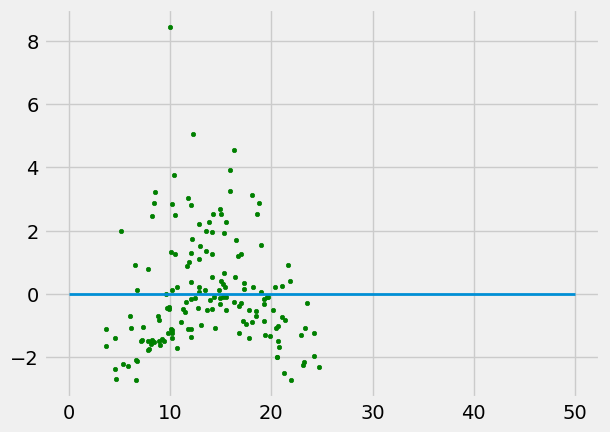

In [46]:
plt.scatter(LR.predict(xtr),LR.predict(xtr) - ytr, color = "green", s = 10, label = 'Train data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)

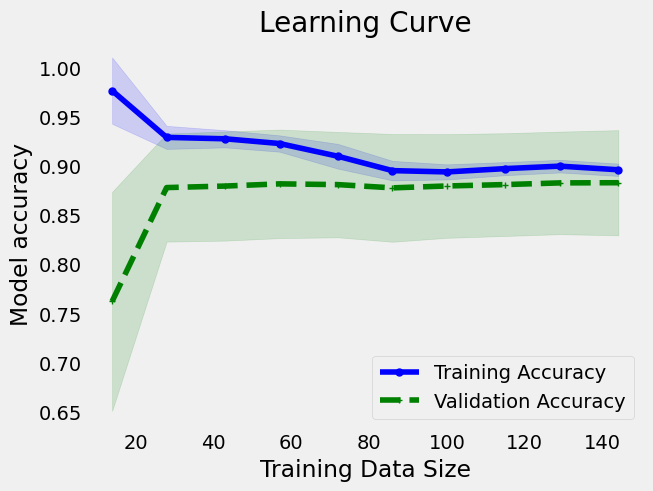

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.pipeline import make_pipeline


pipeline = make_pipeline(StandardScaler(),LinearRegression())

train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=xtr, y=ytr,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
plt.legend(loc='lower right')
plt.show()


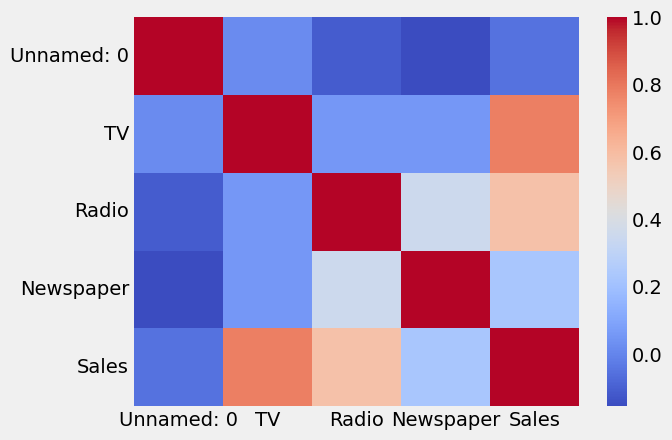

In [48]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("T:/Assignments of ML/Ex_3/Advertising.csv")
plt.figure()
sns.heatmap(df.corr(),cmap='coolwarm')
plt.show()


In [49]:
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn import preprocessing
import numpy as np


array = dataset.values
X = array[:,0:4]
Y = dataset['Sales']
xtr,xte,ytr,yte=ms.train_test_split(X,Y,train_size=0.8,random_state=1)

# normalize the data attributes
normalized = preprocessing.normalize(X)
print("Normalized Data = ", normalized)



Normalized Data =  [[0.00411121 0.94598893 0.15540366 0.28449559]
 [0.02681546 0.59664395 0.52692376 0.60468859]
 [0.03532067 0.20250519 0.5404063  0.81590755]
 [0.02386362 0.90383451 0.24639185 0.3490054 ]
 [0.02626461 0.94972812 0.05673155 0.30677059]
 [0.06655215 0.09650061 0.5424     0.83190185]
 [0.09916029 0.81453094 0.46463678 0.33289525]
 [0.06525285 0.98042414 0.15986949 0.09461664]
 [0.71069121 0.67910494 0.16582795 0.07896569]
 [0.04970498 0.99310554 0.0129233  0.10537456]
 [0.1538877  0.92472518 0.08114079 0.33855294]
 [0.05545101 0.99211102 0.11090202 0.01848367]
 [0.1636514  0.29960795 0.44185878 0.82958671]
 [0.14133593 0.98430381 0.07672522 0.07268705]
 [0.07064774 0.96128019 0.15495403 0.21665306]
 [0.07670455 0.93675437 0.22867545 0.25360443]
 [0.12261862 0.4890319  0.26399067 0.82226602]
 [0.06203513 0.9698159  0.13647729 0.19230891]
 [0.24725879 0.90054254 0.26677922 0.23814926]
 [0.1317807  0.97056488 0.15747794 0.12585057]
 [0.09230577 0.95997997 0.1217557  0.2347

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtr,ytr)

LinearRegression()

In [51]:
from sklearn.metrics import mean_squared_error

print(model.intercept_)
print(model.coef_)
pred=model.predict(xte)
predictions = pred.reshape(-1,1)

print('MSE : ', mean_squared_error(yte,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(yte,predictions)))

2.9246804226395344
[-1.36610117e-04  4.68432118e-02  1.78501247e-01  2.52272234e-03]
MSE :  1.9897012313285742
RMSE :  1.4105676982437156


In [52]:
y_pred = LR.predict(xtr)
df_preds = pd.DataFrame({'Actual': ytr.squeeze(), 'Predicted': ypred.squeeze(),'Error': ypred.squeeze()-ytr.squeeze()})
print(df_preds)

     Actual  Predicted     Error
108     5.3   3.659418 -1.640582
107     8.7   7.256630 -1.443370
189     6.7   5.993589 -0.706411
14     19.0  18.472067 -0.527933
56      5.5   8.379175  2.879175
..      ...        ...       ...
133    19.6  19.296079 -0.303921
137    20.8  21.036108  0.236108
72      8.8  10.109336  1.309336
140    10.9   9.410774 -1.489226
37     14.7  15.351927  0.651927

[160 rows x 3 columns]


In [53]:
ypre=LR.predict(xte)  

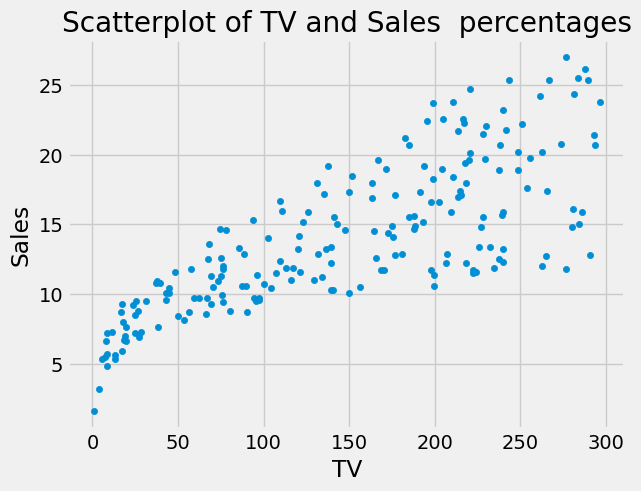

In [65]:
df.plot.scatter(x='TV', y='Sales', title='Scatterplot of TV and Sales  percentages');

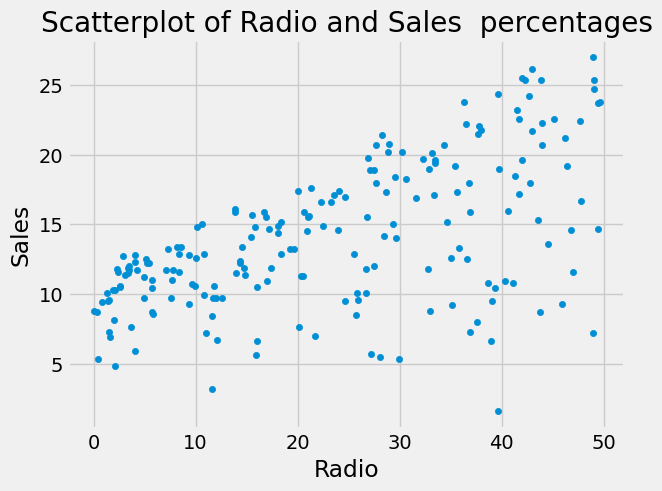

In [55]:
df.plot.scatter(x='Radio', y='Sales', title='Scatterplot of Radio and Sales  percentages');

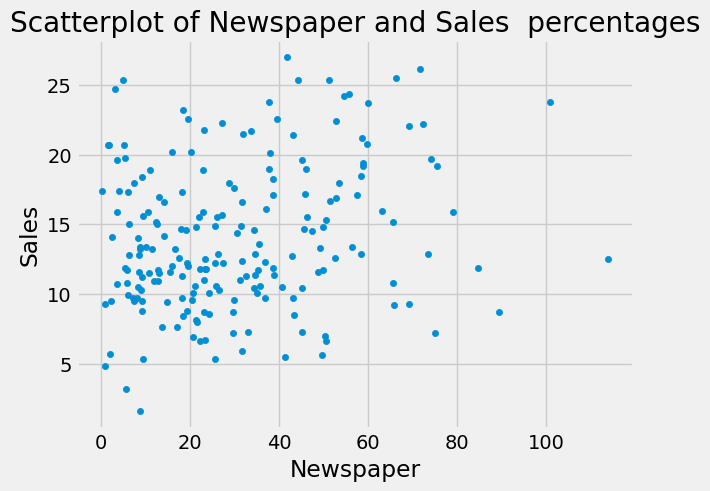

In [56]:
df.plot.scatter(x='Newspaper', y='Sales', title='Scatterplot of Newspaper and Sales  percentages');

In [57]:
print(df.corr())

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


In [58]:
print(df.describe())

       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50%    100.500000  149.750000   22.900000   25.750000   12.900000
75%    150.250000  218.825000   36.525000   45.100000   17.400000
max    200.000000  296.400000   49.600000  114.000000   27.000000


In [60]:
r_sq = model.score(X, Y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
intercept: 5.52257927519819
print(f"coefficients: {model.coef_}")

coefficient of determination: 0.8962051825476649
intercept: 2.9246804226395344
coefficients: [-1.36610117e-04  4.68432118e-02  1.78501247e-01  2.52272234e-03]


In [62]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[20.62508638 12.13780391 12.09800573 17.54056133 13.46839052 12.24931186
 11.53133371 12.08202962  3.70367789 12.800173    7.11587113 17.2743995
 10.46941411  8.86475411 18.47206706 20.72361975 12.9190638  23.31331854
  9.86907647 14.13631712 18.23156699 15.01189382  6.50316564 16.69847344
  8.1348788  15.9101564  14.87675976 17.20665167 19.47046397  9.1866599
 21.80138915 11.41220629  7.81676602 18.9323745   7.67136433 17.29038239
 23.25304732 15.35192718  9.79282591 20.40969244 16.46512564 17.2697623
 21.62099862 14.17654045  8.79101351 15.21638656  8.97731938 21.61028177
 16.5069678   8.23296156 12.91762709  9.34332894 20.59771293 19.86571537
 20.40382581 21.20347003  8.37917484 12.76590362 21.73993796 18.07559665
  5.83344779 22.91633801 16.96129422 13.03156301 16.76970588  7.81017782
  8.78776938 12.05465019 18.97236705 20.97554883 17.80123209 10.69076728
 10.10933565 10.0725012  17.33495441 11.73198421  4.54017212 13.68174006
  8.52774244  9.78029867 11.314676

            Unnamed: 0        TV     Radio  Newspaper     Sales
Unnamed: 0    1.000000  0.017715 -0.110680  -0.154944 -0.051616
TV            0.017715  1.000000  0.054809   0.056648  0.782224
Radio        -0.110680  0.054809  1.000000   0.354104  0.576223
Newspaper    -0.154944  0.056648  0.354104   1.000000  0.228299
Sales        -0.051616  0.782224  0.576223   0.228299  1.000000


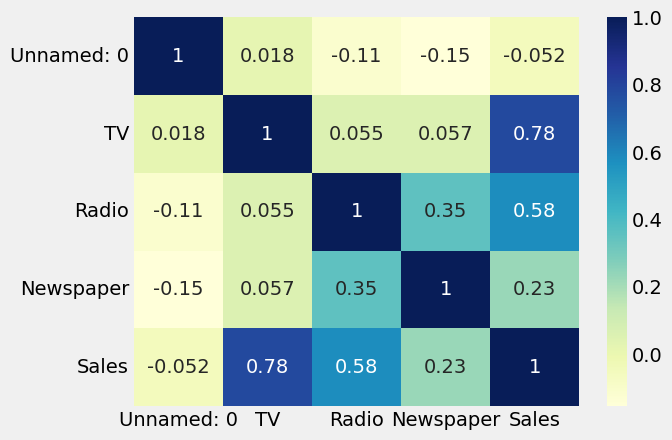

In [74]:
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb

dataset = pd.read_csv("T:/Assignments of ML/Ex_3/Advertising.csv") 
print(dataset.corr())

dataplt = sb.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
  
mp.show()